In [1]:
# Some possible ideas for analysis are the following:

    # Find out the average age of the patients in the dataset.
    # Analyze where a majority of the individuals are from.
    # Look at the different costs between smokers vs. non-smokers.
    # Figure out what the average age is for someone who has at least one child in this dataset.

In [2]:
import pandas as pd
import matplotlib as plt

In [16]:
df_original = pd.read_csv('insurance.csv')
df_original.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
print(type(df_original))

<class 'pandas.core.frame.DataFrame'>


In [5]:
df_to_modify = df_original

In [6]:
df_to_modify['sex'] = df_to_modify['sex'].replace(['female'], 1)
df_to_modify['sex'] = df_to_modify['sex'].replace(['male'], 2)
        

In [7]:
df_to_modify.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,2,33.770,1,no,southeast,1725.55230
2,28,2,33.000,3,no,southeast,4449.46200
3,33,2,22.705,0,no,northwest,21984.47061
4,32,2,28.880,0,no,northwest,3866.85520


In [8]:
df_to_modify['smoker'] = df_to_modify['smoker'].replace(['yes'], 1)
df_to_modify['smoker'] = df_to_modify['smoker'].replace(['no'], 0)

In [9]:
df_to_modify.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,2,33.770,1,0,southeast,1725.55230
2,28,2,33.000,3,0,southeast,4449.46200
3,33,2,22.705,0,0,northwest,21984.47061
4,32,2,28.880,0,0,northwest,3866.85520


In [10]:
df_to_modify.mean()

age            39.207025
sex             1.505232
bmi            30.663397
children        1.094918
smoker          0.204783
charges     13270.422265
dtype: float64

In [11]:
print(round(df_to_modify['bmi'].mean(), 2))

30.66


array([[<AxesSubplot:title={'center':'bmi'}>]], dtype=object)

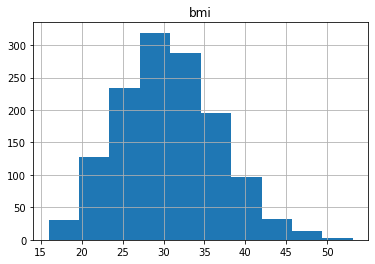

In [12]:

df_to_modify.hist(column='bmi')

In [14]:
df_to_modify.groupby(['region']).count()

,age,sex,bmi,children,smoker,charges
region,,,,,,
northeast,324,324,324,324,324,324
northwest,325,325,325,325,325,325
southeast,364,364,364,364,364,364
southwest,325,325,325,325,325,325


In [17]:
df_original.groupby(['region', 'smoker']).agg({'charges': ['mean', 'min', 'max']})

charges                         
                          mean         min          max
region    smoker                                       
northeast no       9165.531672   1694.7964  32108.66282
          yes     29673.536473  12829.4551  58571.07448
northwest no       8556.463715   1621.3402  33471.97189
          yes     30192.003182  14711.7438  60021.39897
southeast no       8032.216309   1121.8739  36580.28216
          yes     34844.996824  16577.7795  63770.42801
southwest no       8019.284513   1241.5650  36910.60803
          yes     32269.063494  13844.5060  52590.82939

In [29]:
correlation_df = df_to_modify.corr()
correlation_df

,age,sex,bmi,children,smoker,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.787251
charges,0.299008,0.057292,0.198341,0.067998,0.787251,1.000000


In [30]:
correlation_df.iloc[4]['charges']

0.7872514304984763

In [32]:
r_squared_smoker_charges = correlation_df.iloc[4]['charges'] ** 2
print(r_squared_smoker_charges)

0.6197648148218974


Based on the r^2 value of the pearson's correlation coeficient, smoking explains about 62% of the variability in the estimated cost of insurance per individual

In [36]:
df_original.groupby(['region', 'sex']).agg({'age': ['mean', 'min', 'max']})

age        
                       mean min max
region    sex                      
northeast female  39.639752  18  64
          male    38.901840  18  64
northwest female  39.591463  19  64
          male    38.795031  19  64
southeast female  39.108571  18  64
          male    38.783069  18  64
southwest female  39.703704  19  64
          male    39.208589  19  64